In [32]:
import numpy as np

def sigmoid(x):
	return 1 / (1 + np.exp(-x))

def mse_loss(y_true, y_pred):
	return np.mean((y_true - y_pred) ** 2)

def cross_entropy_loss(y_true, y_pred):
	eps = 1e-12
	y_pred = np.clip(y_pred, eps, 1 - eps)
	return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class ForwardHiddenOutput:
	def __init__(self, hidden_dim, output_dim, activation='sigmoid', loss='mse'):
		self.W = np.random.randn(hidden_dim, output_dim) * 0.1
		self.b = np.zeros((1, output_dim))
		self.activation = sigmoid
		self.loss = mse_loss if loss == 'mse' else cross_entropy_loss

	def forward(self, H):
		z = H @ self.W + self.b
		a = self.activation(z)
		return a, z

	def compute_loss(self, y_true, y_pred):
		return self.loss(y_true, y_pred)

In [33]:
def relu(x):
	return np.maximum(0, x)

class ForwardInputHidden:
	def __init__(self, input_dim, hidden_dim, activation='sigmoid'):
		self.W = np.random.randn(input_dim, hidden_dim) * 0.1
		self.b = np.zeros((1, hidden_dim))
		self.activation = sigmoid if activation == 'sigmoid' else relu

	def forward(self, X):
		z = X @ self.W + self.b
		a = self.activation(z)
		return a, z

In [34]:
def update_weights(W, dW, b, db, lr):
	W -= lr * dW
	b -= lr * db
	return W, b

def train_loop(model, X, y, epochs=1000, lr=0.1):
	losses = []
	for epoch in range(epochs):
		y_pred, _ = model.forward(X)
		loss = model.compute_loss(y, y_pred)
		losses.append(loss)
		if epoch % 100 == 0:
			print(f"Epoch {epoch}, Loss: {loss}")
	return losses

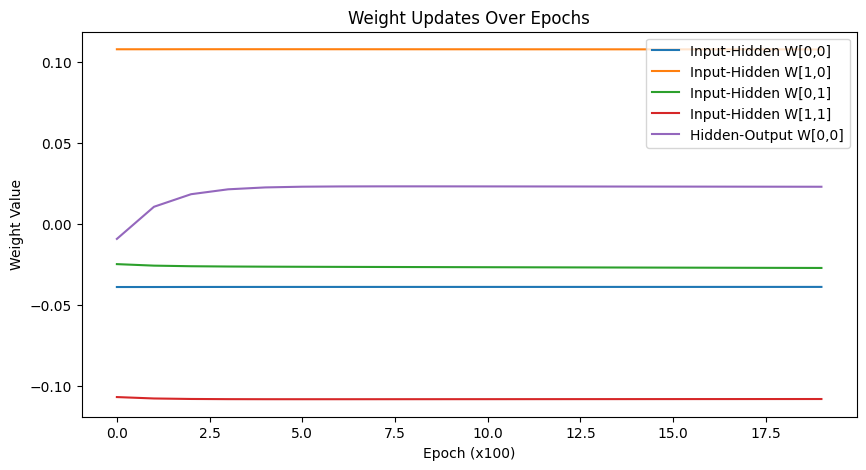

In [35]:
import matplotlib.pyplot as plt

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

input_dim, hidden_dim, output_dim = 2, 2, 1
fwd1 = ForwardInputHidden(input_dim, hidden_dim, activation='sigmoid')
fwd2 = ForwardHiddenOutput(hidden_dim, output_dim, activation='sigmoid', loss='mse')
lr = 0.1
epochs = 2000
weights1, weights2 = [], []

for epoch in range(epochs):
  a1, z1 = fwd1.forward(X)
  y_pred, z2 = fwd2.forward(a1)
  dz2 = (y_pred - y) * y_pred * (1 - y_pred)
  dW2 = a1.T @ dz2 / X.shape[0]
  db2 = np.sum(dz2, axis=0, keepdims=True) / X.shape[0]
  dz1 = (dz2 @ fwd2.W.T) * a1 * (1 - a1)
  dW1 = X.T @ dz1 / X.shape[0]
  db1 = np.sum(dz1, axis=0, keepdims=True) / X.shape[0]
  fwd2.W, fwd2.b = update_weights(fwd2.W, dW2, fwd2.b, db2, lr)
  fwd1.W, fwd1.b = update_weights(fwd1.W, dW1, fwd1.b, db1, lr)
  if epoch % 100 == 0:
    weights1.append(fwd1.W.copy())
    weights2.append(fwd2.W.copy())

weights1 = np.array(weights1)
weights2 = np.array(weights2)

plt.figure(figsize=(10,5))
for i in range(weights1.shape[2]):
  plt.plot(weights1[:,0,i], label=f'Input-Hidden W[0,{i}]')
  plt.plot(weights1[:,1,i], label=f'Input-Hidden W[1,{i}]')
for i in range(weights2.shape[2]):
  plt.plot(weights2[:,0,i], label=f'Hidden-Output W[0,{i}]')
plt.legend()
plt.title('Weight Updates Over Epochs')
plt.xlabel('Epoch (x100)')
plt.ylabel('Weight Value')
plt.show()